<a href="https://colab.research.google.com/github/fatjan/final-project-DPS1-B/blob/version2/waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import files
files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

# Visit www.kaggle.com ⇨ login ⇨ My Account ⇨ Create New API Token
# kaggle.json will be downloaded
# upload kaggle.json file here

Saving kaggle.json to kaggle (1).json
kaggle.json


In [33]:
!mkdir dataset-waste #make a folder for our downloaded dataset

mkdir: cannot create directory ‘dataset-waste’: File exists


In [34]:
!kaggle datasets download -d sapal6/waste-classification-data-v2 -p /content/dataset-waste

waste-classification-data-v2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
cd dataset-waste/

/content/dataset-waste/dataset-waste


In [0]:
!unzip -qq waste-classification-data-v2.zip

In [0]:
import numpy as np
import random
import os
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
dataset_dir = os.path.join('/content', 'dataset-waste/DATASET')
train_dir = os.path.join(dataset_dir, 'TRAIN')
test_dir = os.path.join(dataset_dir, 'TEST')
n_train_dir = os.path.join(train_dir, 'N')
o_train_dir = os.path.join(train_dir, 'O')
r_train_dir = os.path.join(train_dir, 'R')
n_test_dir = os.path.join(test_dir, 'N')
o_test_dir = os.path.join(test_dir, 'O')
r_test_dir = os.path.join(test_dir, 'R')

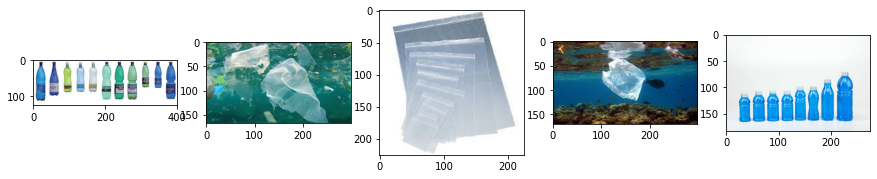

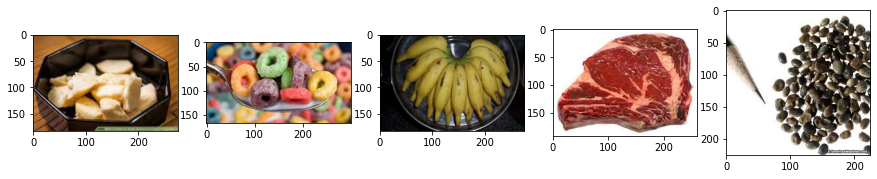

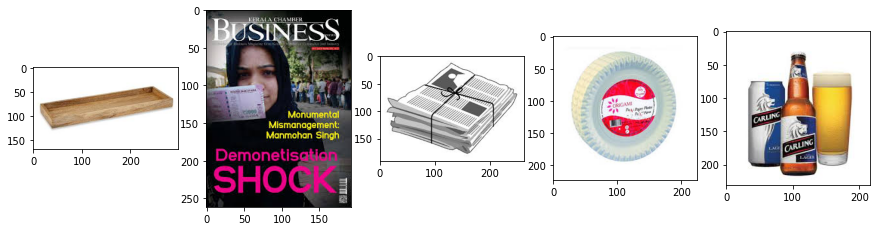

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

numb_of_pic = 5
rand_int = []
for i in range(numb_of_pic):
  rand_int.append(random.randint(0, len(os.listdir(n_train_dir))))

n_listdir = [os.listdir(n_train_dir)[i] for i in rand_int]
o_listdir = [os.listdir(o_train_dir)[i] for i in rand_int]
r_listdir = [os.listdir(r_train_dir)[i] for i in rand_int]

n_listdir = [os.path.join(n_train_dir, fname) for fname in n_listdir]
o_listdir = [os.path.join(o_train_dir, fname) for fname in o_listdir]
r_listdir = [os.path.join(r_train_dir, fname) for fname in r_listdir]

plt.figure(figsize=(15, 10))
for i, image in enumerate(n_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(n_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(o_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(o_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

plt.figure(figsize=(15, 10))
for i, image in enumerate(r_listdir):
  img = mpimg.imread(image)
  plt.subplot(len(r_listdir) / numb_of_pic + 1, numb_of_pic, i + 1)
  plt.imshow(img)

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = test_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 22564 images belonging to 3 classes.
Found 2907 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
___________________________________

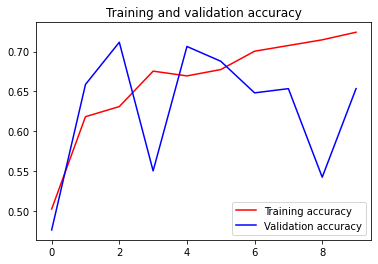

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving bo.jpeg to bo (1).jpeg
bo.jpeg
[[1.0000000e+00 0.0000000e+00 2.9942738e-24]]
It is a Non-organic trash.


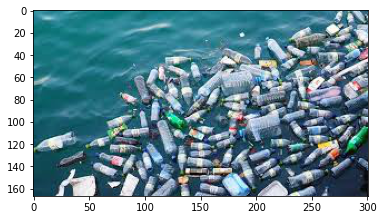

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  real_img = image.load_img(path)
  plt.imshow(real_img)
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  labels = ['Non-organic', 'Organic', 'Recyclable']
  max_value = max(classes[0])
  # print(max_value)
  list_classes = classes.tolist()
  index = list_classes[0].index(max_value)
  if index == 1:
    print('It is an ' + labels[index] + ' trash.')
  else:
    print('It is a ' + labels[index] + ' trash.')